<a href="https://colab.research.google.com/github/princealexanderm/ICT_DAS_Prince_Alex/blob/main/ICT_Virtual_competition_2_Prince_Alex_08_08_24_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading training data

In [2]:
df1=pd.read_csv('/content/train_ctrUa4K.csv')
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df1['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [4]:
df1.shape

(614, 13)

# Loading test data

In [6]:
df2=pd.read_csv('/content/test_lAUu6dG.csv')
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
df2.shape

(367, 12)

# Loading sample submission file

In [8]:
df3=pd.read_csv('/content/sample_submission_49d68Cx.csv')
df3.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


# Basic checking for training data

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df1.shape

(614, 13)

# Checking for null values

In [13]:
df1.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# Checking for outliers

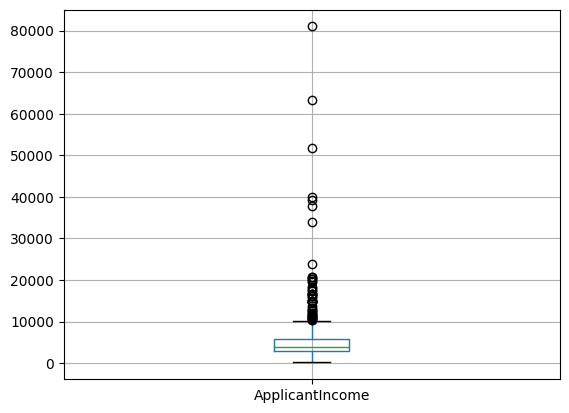

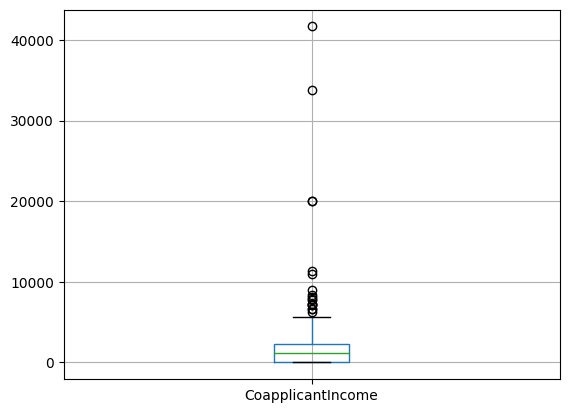

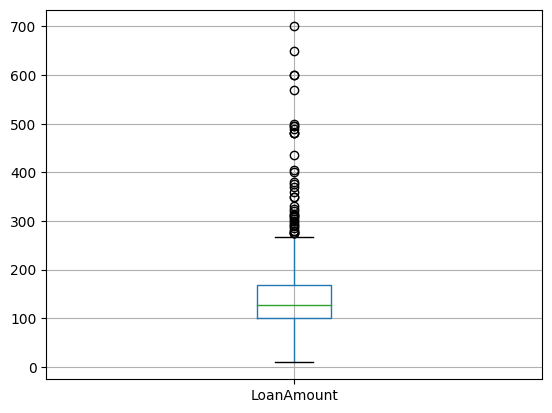

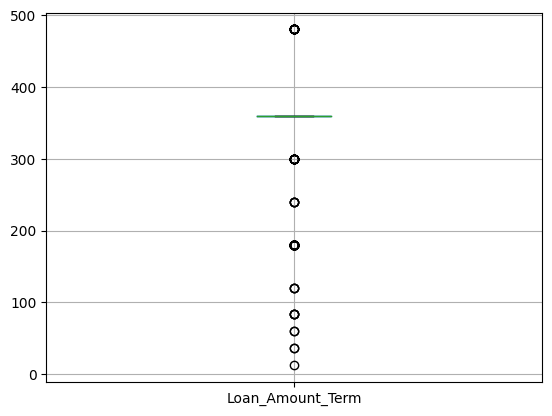

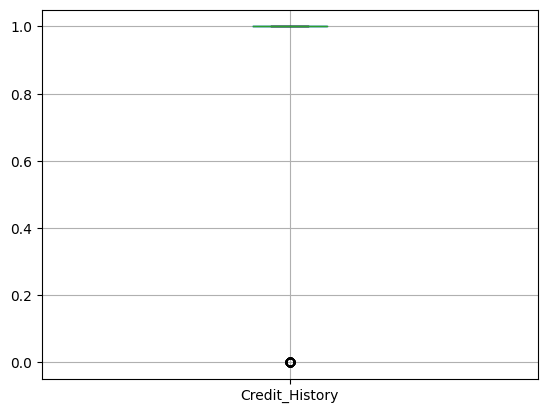

In [14]:
for col in df1.columns:
  if df1[col].dtype != 'object':
    plt.figure()
    df1.boxplot([col])

#Removing outilers from data which are not object type

In [15]:
#IQR, we have outliers in wine servings and sprit servings

for col in df1.columns:
  if df1[col].dtype != 'object':
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    #to find iqr
    iqr=q3-q1

    #upper bound and lower bound
    upper=q3+q1+1.5*iqr
    lower=q1-1.5*iqr

    df1[col]=np.where(df1[col]>upper, upper,df1[col])
    #condition, repace with upper, otherwise keep the same value
    df1[col]=np.where(df1[col]<lower, lower,df1[col])

#Check we removed all outliers ?

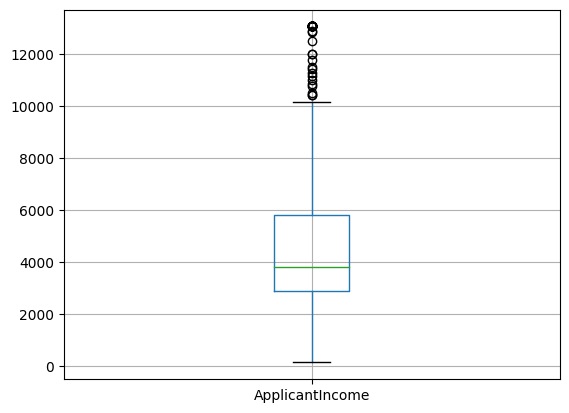

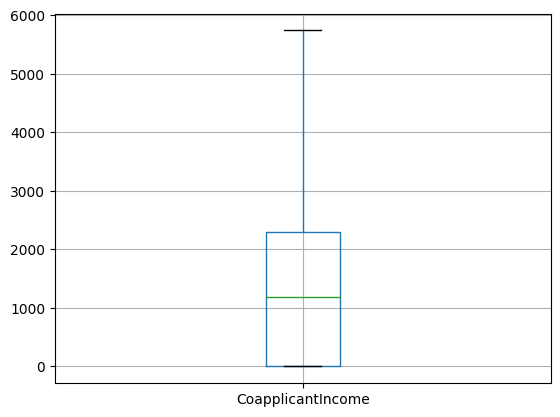

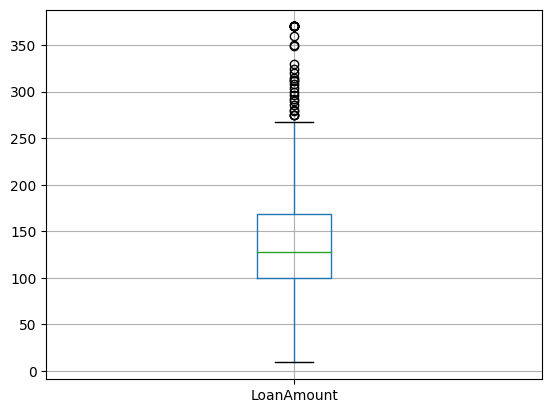

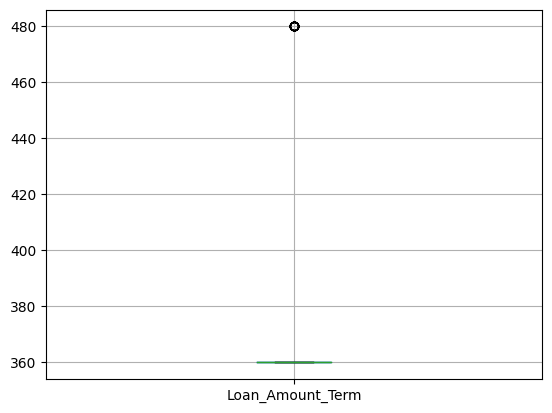

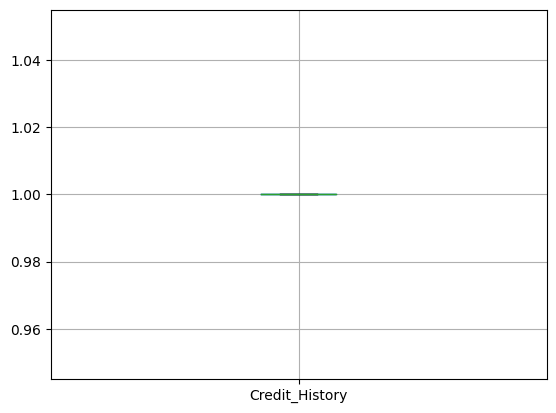

In [16]:
for col in df1.columns:
  if df1[col].dtype != 'object':
    plt.figure()
    df1.boxplot([col])

# Filling missing values
# Filling numerical columms with median
# Filling categorical columns with mode

In [17]:
# Separate numerical and categorical columns
numerical_cols = df1.select_dtypes(include=['number']).columns
categorical_cols = df1.select_dtypes(include=['object']).columns

In [18]:
numerical_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [19]:
categorical_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Filling numerical columns with median

In [20]:
for col in numerical_cols:
    df1[col] = df1[col].fillna(df1[col].median())

# Filling categorical columns with mode

In [21]:
for col in categorical_cols:
    df1[col] = df1[col].fillna(df1[col].mode()[0])

In [22]:
df1.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [23]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


#Encoding

In [24]:
df11=pd.get_dummies(df1,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],dtype=int)

In [25]:
df11

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849.0,0.0,128.0,360.0,1.0,Y,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,4583.0,1508.0,128.0,360.0,1.0,N,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000.0,0.0,66.0,360.0,1.0,Y,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583.0,2358.0,120.0,360.0,1.0,Y,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000.0,0.0,141.0,360.0,1.0,Y,0,1,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2900.0,0.0,71.0,360.0,1.0,Y,1,0,1,...,0,0,0,1,0,1,0,1,0,0
610,LP002979,4106.0,0.0,40.0,360.0,1.0,Y,0,1,0,...,0,0,1,1,0,1,0,1,0,0
611,LP002983,8072.0,240.0,253.0,360.0,1.0,Y,0,1,0,...,1,0,0,1,0,1,0,0,0,1
612,LP002984,7583.0,0.0,187.0,360.0,1.0,Y,0,1,0,...,0,1,0,1,0,1,0,0,0,1


#Encloding Target variable 'Loan_Status' using LabelEncoder

In [26]:
df11.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

In [28]:
df11['Loan_Status']=encoder.fit_transform(df11['Loan_Status'])
df11.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849.0,0.0,128.0,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,LP001003,4583.0,1508.0,128.0,360.0,1.0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,LP001005,3000.0,0.0,66.0,360.0,1.0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583.0,2358.0,120.0,360.0,1.0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,LP001008,6000.0,0.0,141.0,360.0,1.0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1


#Split the data into target and independent variable

In [58]:
X=df11.drop(['Loan_ID','Loan_Status'],axis=1)
y=df11['Loan_Status']

# Split the data for testing and training

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling using Standard Scaler

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Creating a model

#1. Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred_log = logit_model.predict(X_test)

# Evaluating

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred_log))
print('Precision is', precision_score(y_test, y_pred_log))
print('Recall is', recall_score(y_test, y_pred_log))
print('f1 score is', f1_score(y_test,y_pred_log))

Accuracy is 0.6016260162601627
Precision is 0.6324786324786325
Recall is 0.925
f1 score is 0.751269035532995


#2. KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn))
print('Recall is', recall_score(y_test, y_pred_knn))
print('f1 score is', f1_score(y_test,y_pred_knn))

Accuracy is 0.6341463414634146
Precision is 0.6767676767676768
Recall is 0.8375
f1 score is 0.7486033519553074


#3. SVM

In [70]:
from sklearn.svm import SVC

svc_model=SVC()
svc_model.fit(X_train,y_train)
y_pred_svm = svc_model.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred_svm))
print('Precision is', precision_score(y_test, y_pred_svm))
print('Recall is', recall_score(y_test, y_pred_svm))
print('f1 score is', f1_score(y_test,y_pred_svm))

Accuracy is 0.6260162601626016
Precision is 0.6416666666666667
Recall is 0.9625
f1 score is 0.77


#4. Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred_dt))
print('Precision is', precision_score(y_test, y_pred_dt))
print('Recall is', recall_score(y_test, y_pred_dt))
print('f1 score is', f1_score(y_test,y_pred_dt))

Accuracy is 0.5528455284552846
Precision is 0.6506024096385542
Recall is 0.675
f1 score is 0.6625766871165645


#5. Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred_rf))
print('Precision is', precision_score(y_test, y_pred_rf))
print('Recall is', recall_score(y_test, y_pred_rf))
print('f1 score is', f1_score(y_test,y_pred_rf))

Accuracy is 0.6097560975609756
Precision is 0.6454545454545455
Recall is 0.8875
f1 score is 0.7473684210526316


---

#KNN gives the best value

# Loading the test file

In [76]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


# Preprocessing test file

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    float64
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(5), object(7)
memory usage: 34.5+ KB


In [78]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.0
mean,4402.000000,1425.501362,134.761240,362.615804,1.0
std,2351.285308,1600.086250,55.081402,17.546879,0.0
min,0.000000,0.000000,28.000000,360.000000,1.0
25%,2864.000000,0.000000,101.000000,360.000000,1.0
50%,3786.000000,1025.000000,125.000000,360.000000,1.0
75%,5060.000000,2430.500000,157.500000,360.000000,1.0
max,11218.000000,6076.250000,344.875000,480.000000,1.0


# Checking for null values

In [79]:
df2.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# Cheking for outliers

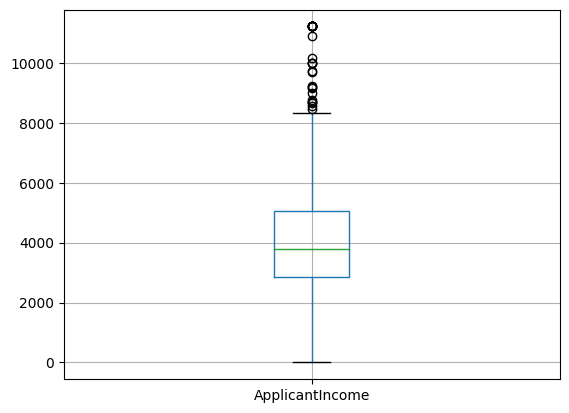

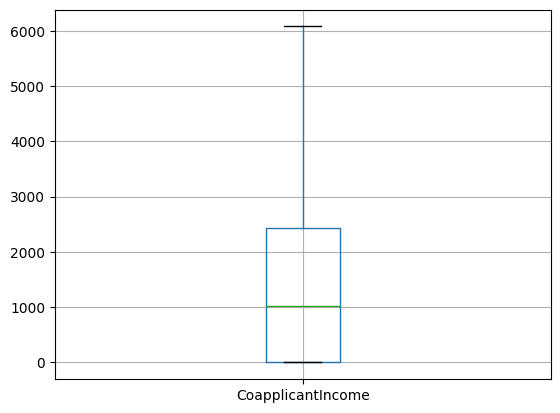

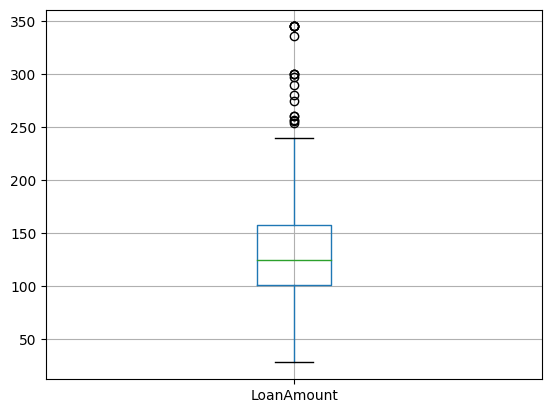

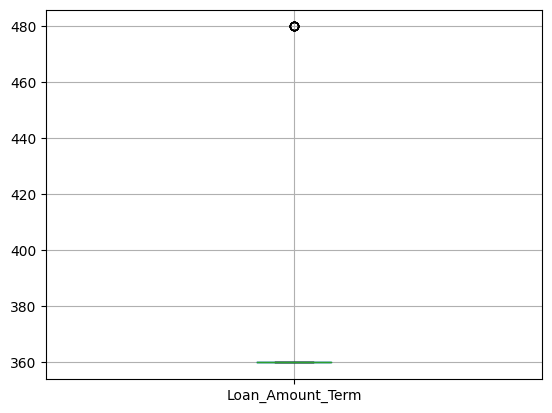

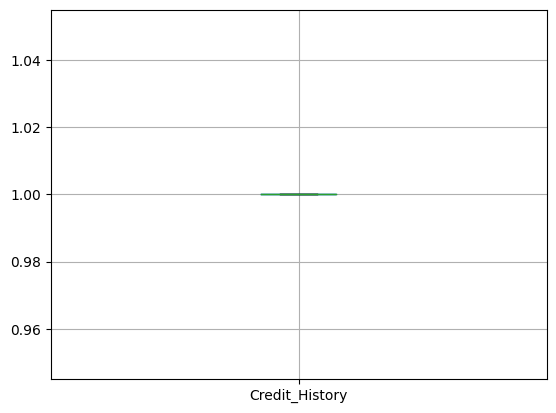

In [80]:
for col in df2.columns:
  if df2[col].dtype != 'object':
    plt.figure()
    df2.boxplot([col])

# Removing all outliers which are not object types

In [81]:
#IQR, we have outliers in wine servings and sprit servings

for col in df2.columns:
  if df2[col].dtype != 'object':
    q1=df2[col].quantile(0.25)
    q3=df2[col].quantile(0.75)
    #to find iqr
    iqr=q3-q1

    #upper bound and lower bound
    upper=q3+q1+1.5*iqr
    lower=q1-1.5*iqr

    df2[col]=np.where(df2[col]>upper, upper,df2[col])
    #condition, repace with upper, otherwise keep the same value
    df2[col]=np.where(df2[col]<lower, lower,df2[col])

# Checking we removed all outliers

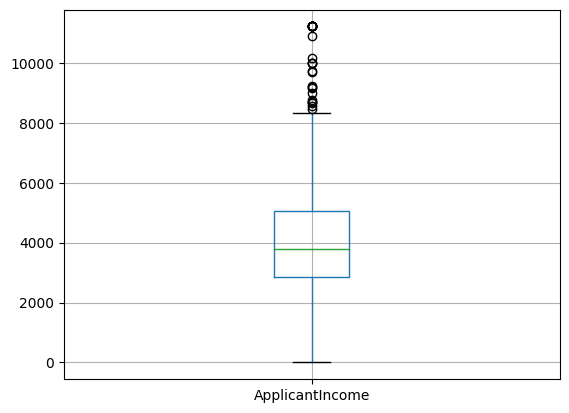

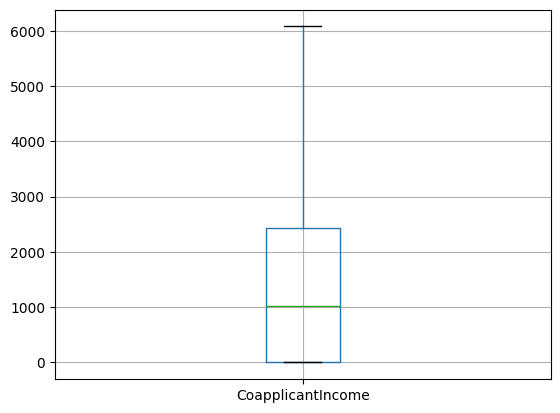

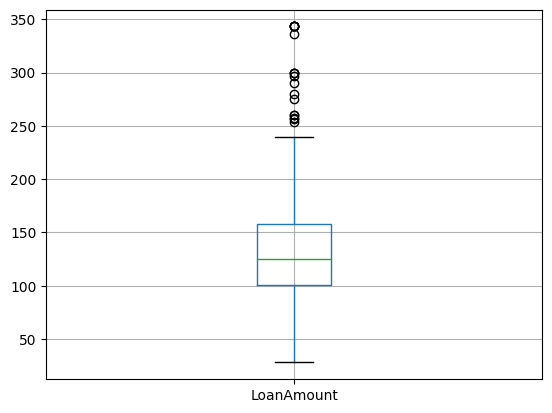

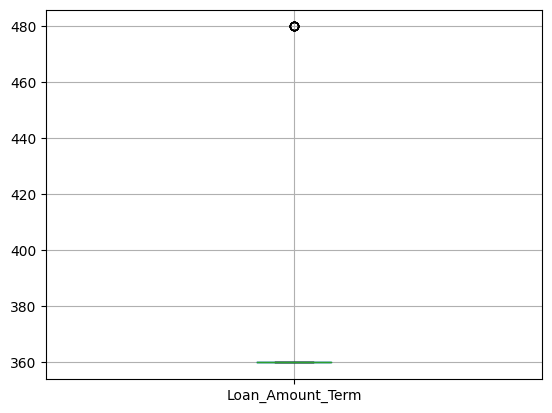

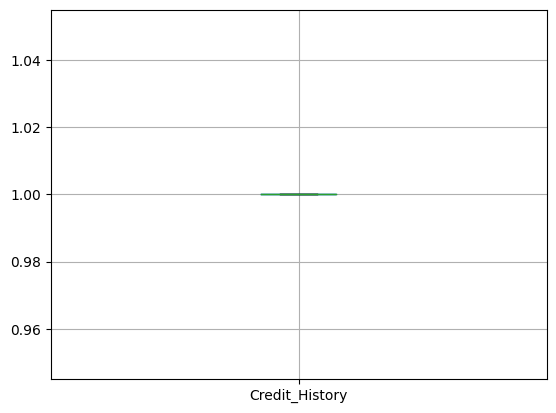

In [82]:
for col in df2.columns:
  if df2[col].dtype != 'object':
    plt.figure()
    df2.boxplot([col])

# Filling categorical columns with mode

In [83]:
# Separate numerical and categorical columns
numerical_cols = df2.select_dtypes(include=['number']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns

In [84]:
numerical_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [85]:
categorical_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

# Filling numerical columns with median

In [86]:
for col in numerical_cols:
    df2[col] = df2[col].fillna(df2[col].median())

# Filling categorical columns with mode

In [87]:
for col in categorical_cols:
    df2[col] = df2[col].fillna(df2[col].mode()[0])

In [88]:
df2.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [89]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0.0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500.0,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800.0,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546.0,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0.0,78.0,360.0,1.0,Urban


# Encoding

In [90]:
df22=pd.get_dummies(df2,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],dtype=int)

In [91]:
df22.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720.0,0.0,110.0,360.0,1.0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,LP001022,3076.0,1500.0,126.0,360.0,1.0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,LP001031,5000.0,1800.0,208.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,LP001035,2340.0,2546.0,100.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,LP001051,3276.0,0.0,78.0,360.0,1.0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [92]:
df22.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

# Scaling using Standar Scaler

In [93]:
X_test=df22.drop(['Loan_ID'],axis=1)

In [94]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_test=scaler.fit_transform(X_test)

# Predicting y

In [95]:
y_pred_knn = knn_model.predict(X_test)

In [96]:
y_pred_knn

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,

In [98]:
y_pred_final = np.where(y_pred_knn == 1, "Y", "N")

In [99]:
y_pred_final

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

# Load Sample submission file

In [100]:
df3.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [101]:
df_final = pd.DataFrame({
    "Loan_ID":df3['Loan_ID'],  # First column can be left empty or filled with placeholders
    "Loan_Status": y_pred_final  # Place the array values in the second column
})

In [102]:
df_final.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [103]:
df_final.to_csv("sample_submission_49d68Cx.csv", index=False)